# Regression Modeling

### Import Libraries and Data

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer, make_column_selector, TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [45]:
df = pd.read_csv('./data/school_df_v6.csv')

In [46]:
df = df.iloc[:,:45]
df.dropna(how='all', inplace=True)

In [47]:
# drop 2 schools that have no attendance data
df.drop(df[df['code'] == 201].index, inplace = True)
df.drop(df[df['code'] == 347].index, inplace = True)
df = df.replace(-1,np.nan)
df.dropna(how='any',inplace=True)

In [48]:
df = df.replace(-1,np.nan)
df.dropna(how='any',inplace=True)

In [49]:
df.shape

(81, 45)

In [50]:
df.head(2)

,code,name,grade_band,enrollment_SY1718,enrollment_SY1819,star_score_SY1718,star_score_SY1819,star_rating_SY1718,star_rating_SY1819,capacity_SY1718,...,count_20+_SY1718,pct_20+_SY1718,budgeted_amount_FY16,budgeted_enrollment_FY16,budgeted_amount_FY17,budgeted_enrollment_FY17,pct_meet_exceed_math_SY1718,pct_meet_exceed_ela_SY1718,pct_meet_exceed_math_SY1819,pct_meet_exceed_ela_SY1819
0,175.0,School-Within-School @ Goding,Elementary,308.0,313.0,88.55,88.26,5.0,5.0,444.0,...,0.0,0.000000,1.059280e+07,5880.0,3815456.0,2674740.0,0.765,0.765,0.743,0.752
2,202.0,Aiton Elementary School,Elementary,243.0,244.0,43.85,10.79,3.0,1.0,529.0,...,12.0,0.049383,7.429920e+06,2650.0,3780814.0,2499672.0,0.129,0.171,0.153,0.056


In [51]:
df = df[df['star_rating_SY1819'] !=-1]

In [52]:
X=df[['enrollment_SY1718', 'enrollment_SY1819', 'capacity_SY1718', 
        'capacity_SY1819', 'latitude', 'longitude', 'cluster', 'ward','pct_0_SY1819', 
        'pct_1-5_SY1819', 'pct_6-10_SY1819', 'pct_11-20_SY1819', 'pct_20+_SY1819', 
        'pct_0_SY1718', 'pct_1-5_SY1718', 'pct_6-10__SY1718', 'pct_11-20_SY1718', 
        'pct_20+_SY1718', 'budgeted_amount_FY16', 'budgeted_enrollment_FY16', 
        'budgeted_amount_FY17', 'budgeted_enrollment_FY17', 'pct_meet_exceed_math_SY1718', 
        'pct_meet_exceed_ela_SY1718', 'pct_meet_exceed_math_SY1819', 'pct_meet_exceed_ela_SY1819']]

In [53]:
y = df['star_rating_SY1819']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [55]:
sscaler = StandardScaler()
X_train_scaled = sscaler.fit_transform(X_train)
X_test_scaled = sscaler.fit_transform(X_test)

### Null Model

In [13]:
#null model will be 34.5%
y.value_counts(normalize=True)

4.0    0.345679
2.0    0.271605
3.0    0.185185
5.0    0.123457
1.0    0.074074
Name: star_rating_SY1819, dtype: float64

### Linear Regression

In [14]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

-38022132879121.64

### Ridge

In [15]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge.score(X_test_scaled, y_test)

0.6052599211177012

In [16]:
pipe = make_pipeline(StandardScaler(), Ridge())
params = {'ridge__alpha': ['.01', '0.1', '1', '10', '100', '200', '500', '1000', '10_000'],
          'ridge__normalize': [True, False]}
ridge_grid = GridSearchCV(estimator=pipe, param_grid=params, n_jobs=-1)
ridge_grid.fit(X_train, y_train)
ridge_grid.score(X_test, y_test)

0.7024282870722177

### Lasso

In [17]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
lasso.score(X_test_scaled, y_test)

-0.060096153846153966

### Decision Tree Regressor

In [23]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train_scaled, y_train)
dtree.score(X_test_scaled, y_test)

0.4507692307692307

In [24]:
dtree_pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor())
params = {'decisiontreeregressor__min_samples_split': [1, 2, 3, 5, 7, 10, 15, 20, 30]}
dtree_grid = GridSearchCV(estimator=dtree_pipe, param_grid=params, n_jobs=-1)
dtree_grid.fit(X_train, y_train)
dtree_grid.score(X_test, y_test)

c:\programdata\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [        nan  0.16312809  0.02860361  0.1777878  -0.05512402  0.10779256
  0.1441762   0.30629269  0.22977383]
  warnings.warn(


0.8704666975227509

### KNN Regressor

In [25]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.7260307692307693

In [26]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
params = {'kneighborsregressor__n_neighbors': [1, 2, 3, 5, 7, 10, 15, 20, 30],
         'kneighborsregressor__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_grid = GridSearchCV(estimator=knn_pipe, param_grid=params, n_jobs=-1)
knn_grid.fit(X_train, y_train)
knn_grid.score(X_test, y_test)

0.701978021978022

### Random Forest Regressor

In [56]:
rforest = RandomForestRegressor()
rforest.fit(X_train_scaled, y_train)
rforest.score(X_test_scaled, y_test)

0.7116635384615384

In [57]:
rforest_pipe = make_pipeline(StandardScaler(), RandomForestRegressor())
params = {'randomforestregressor__n_estimators': [50, 100, 200, 300, 500, 1000]}
rforest_grid = GridSearchCV(estimator=rforest_pipe, param_grid=params, n_jobs=-1)
rforest_grid.fit(X_train, y_train)
rforest_grid.score(X_test, y_test)

0.7916175384615385

In [58]:
y_pred = rforest_grid.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

0.554201842779039

### Elastic Net

In [30]:
enet_pipe = make_pipeline(StandardScaler(), ElasticNet())
enet_pipe.fit(X_train, y_train)
enet_pipe.score(X_test, y_test)

0.3483953572808459

### PolynomialFeatures

In [33]:
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y)

sscaler = StandardScaler()
X_poly_train_scaled = sscaler.fit_transform(X_poly_train)
X_poly_test_scaled = sscaler.transform(X_poly_test)

ridge_poly = Ridge()
ridge_poly.fit(X_poly_train_scaled, y_train)
ridge_poly.score(X_poly_test_scaled, y_test)

-0.15015762633950747

### Bagging Regressor

In [34]:
bag = BaggingRegressor()
bag.fit(X_train_scaled, y_train)
bag.score(X_test_scaled, y_test)

-0.347220447284345

### Adaboost

In [35]:
ada = AdaBoostRegressor()
ada.fit(X_train_scaled, y_train)
ada.score(X_test_scaled, y_test)

-0.5262477021509193

In [36]:
ada_pipe = make_pipeline(StandardScaler(), AdaBoostRegressor())
params = {'adaboostregressor__n_estimators': [50, 100, 200, 300, 500, 1000],
         'adaboostregressor__loss': ['linear', 'square', 'exponential']}
ada_grid = GridSearchCV(estimator=ada_pipe, param_grid=params, n_jobs=-1)
ada_grid.fit(X_train, y_train)
ada_grid.score(X_test, y_test)

-0.5884640754799395

### Gradient Boosting Regressor

In [37]:
gboost = GradientBoostingRegressor()
gboost.fit(X_train_scaled, y_train)
gboost.score(X_test_scaled, y_test)

-0.47778618205073253

In [38]:
gboost_pipe = make_pipeline(StandardScaler(), GradientBoostingRegressor())
params = {'gradientboostingregressor__n_estimators': [50, 100, 200, 300, 500, 1000]}
gboost_grid = GridSearchCV(estimator=gboost_pipe, param_grid=params, n_jobs=-1)
gboost_grid.fit(X_train, y_train)
gboost_grid.score(X_test, y_test)

-0.526099936451419

### Support Vector

In [39]:
svr = SVR(C=3)
svr.fit(X_train_scaled, y_train)
svr.score(X_test_scaled, y_test)

-0.3695469330036707

# Feature Importance & Model Evaluation

In [40]:
# Random Forest Feature Importance
feat_imp = pd.DataFrame(rforest.feature_importances_, index=X.columns)
feat_imp.sort_values(by=0, ascending=False).head(5)

,0
pct_meet_exceed_math_SY1819,0.226483
pct_meet_exceed_ela_SY1718,0.203570
pct_meet_exceed_math_SY1718,0.182342
pct_meet_exceed_ela_SY1819,0.103229
pct_11-20_SY1819,0.038394


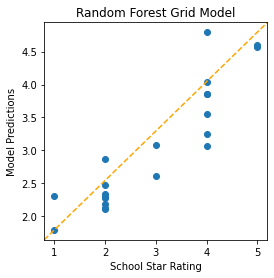

In [59]:
# Random Forest
y_pred = rforest_grid.predict(X_test)
fig, ax = plt.subplots(figsize=(4, 4))
plt.scatter(y_test, y_pred)
ax.plot([0,1], [0,1], transform=ax.transAxes, ls="--", c="orange")
plt.title('Random Forest Grid Model')
plt.xlabel('School Star Rating')
plt.ylabel('Model Predictions');